In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Conclusion EDA

1. Dari hasil observasi, customer yang churn sekitar 16%, sedangkan yang tidak churn sekitar 83%
2. Semakin lama Tenur, maka kemungkinan untuk Churn berkurang. Pengguna baru memiliki kecenderungan untuk Churn lebih besar. Pengguna dengan Tenure 1 tahun memiliki kecenderungan Churn hampir 20% di banding pengguna di tahun ke 2 yang kurang dari 10%.
3. Persentase Churn pelanggan complain 30%
4. Semakin tinggi cashback yang didapatkan, semakin rendah persentase Churn. Terdapat peningkatan Churn signifikan pada pelanggan yang mendapatkan Cashback 221-231 dollar.
5. Semakin lama pengguna tidak melakukan pemesanan, maka tingkat Churn semakin rendah
6. Satisfaction Score 5 adalah yang paling banyak Churn pada tahun pertama. Satisfaction Score 5 memiliki kecenderungan Churn paling banyak yaitu sekitar lebih dari 20%.<br>
Ternyata ~65% Pengguna yang memberikan nilai Satisfaction Score 5, Churned pada Bulan ke 0 dan ~60% pada Bulan ke 1. Meskipun memberikan Satisfaction Score 5, user dengan Cashback terendah USD 110 - 111 memiliki tingkat Churn 100%.
7. Tingkat presentase Churn pada jarak Warehouse ke rumah ada di sekitar 15% - 20%. Terjadi kenaikan signifikan pada jarak 15km, 19km, dan juga 31km. Semakin jauh jarak rumah ke gudang, potensi churn semakin meningkat.

# Conclusion Model

In [2]:
pip install shap

     |████████████████████████████████| 356 kB 39.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491642 sha256=5d9fd77b0278bb1c93b599d107a93a35b11c4984fa2cc23166b9973b653c9edd
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [3]:
import pandas as pd
import xgboost
import shap

In [4]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/finalProject Purwadhika/data/ECommerceDataset_clean.csv", index_col="CustomerID")
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
50002,1,10,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,121
50003,1,10,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120
50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
50005,1,0,Mobile Phone,1,12,Credit Card,Male,2,3,Mobile Phone,5,Single,3,0,11,1,1,3,130


### Feature Importance
Setelah sebelumnya kita melakukan modeling dan kita mendapatkan fitur fitur penting dibawah ini:
- "Tenure"
- "WarehouseToHome"
- "NumberOfDeviceRegistered"
- "SatisfactionScore"
- "NumberOfAddress"
- "DaySinceLastOrder"
- "CashbackAmount"
- "Complain"

Kita akan gunakan fitur fitur penting tersebut untuk mendapatkan wawasan yang lebih dengan churn

In [5]:
X = df.drop(columns=['Churn'])
y = df.Churn

In [6]:
X.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,
50001,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
50002,10,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,121
50003,10,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120
50004,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
50005,0,Mobile Phone,1,12,Credit Card,Male,2,3,Mobile Phone,5,Single,3,0,11,1,1,3,130


In [7]:
X = X.drop(columns=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus',
                    'CityTier', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount'])

In [8]:
X.dtypes

Tenure                      int64
WarehouseToHome             int64
NumberOfDeviceRegistered    int64
SatisfactionScore           int64
NumberOfAddress             int64
Complain                    int64
DaySinceLastOrder           int64
CashbackAmount              int64
dtype: object

In [9]:
# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

[06:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Untuk mendapatkan gambaran tentang fitur mana yang paling penting untuk sebuah model, kita dapat memplot nilai SHAP dari setiap fitur untuk setiap sampel.<br>
Plot di bawah ini mengurutkan fitur berdasarkan jumlah besaran nilai SHAP pada semua sampel, dan menggunakan nilai SHAP untuk menunjukkan dampak distribusi yang dimiliki setiap fitur pada output model.<br>
Warna mewakili nilai fitur (merah High, biru Low).

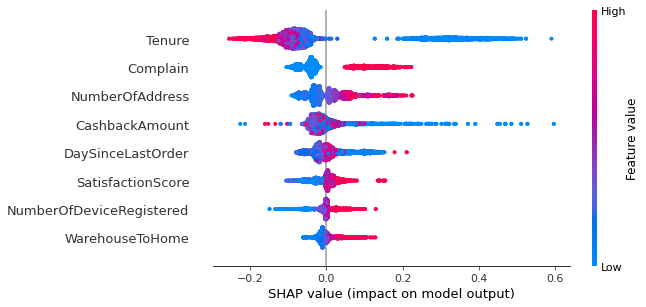

In [10]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

1. Tenure
  - Semakin singkat berlangganan potensi churn semakin meningkat
2. Complain
  - Semakin banyak complain potensi churn semakin meningkat
3. NumberOfAddress
  - Semakin banyak jumlah alamat yang terdaftar potensi churn semakin meningkat
4. CashbackAmount
  - Semakin sedikit jumlah Cashback yang didapat potensi churn semakin meningkat
5. DaySinceLastOrder
  - Semakin singkat interval pemesanan, potensi churn semakin meningkat
6. SatisfactionScore
  - Semakin tinggi nilai kepuasan, potensi churn semakin meningkat
7. NumberOfDeviceRegistered
  - Semakin banyak jumlah device yang terdaftar, potensi churn semakin meningkat
8. WarehouseToHome
 - Semakin jauh jarak dari gudang ke rumah, , potensi churn semakin meningkat

# Recommendation

1. Untuk pengguna dengan masa tenure 0-1 bulan, diberikan insentif (bisa berupa package promo cashback), untuk mencegah potensi churn terhadap Pengguna baru.
2. Diperlukan perbaikan secara fungsi(aplikasi) maupun feedback pelayanan(service) yang lebih responsif terhadap komplain dari user, untuk mencegah pengguna akan churn.
3. Memberikan notifikasi pengingat (reminder) yang bisa digabungkan dengan program insentif untuk pengguna yang telah melakukan pemesanan agar akun pengguna kembali aktif dan tidak churn.
4. Memberikan insentif berupa pengurangan biaya ongkos kirim kepada pelanggan yang memiliki jarak yang jauh terhadap gudang, bisa dengan melakukan kerja sama dengan pihak jasa pengantar (kurir) untuk meringankan cost dari perusahaan.
5. Pengguna baru yang memberikan nilai Satisfaction Score 5 diberikan notifikasi email untuk aktif kembali dengan isi email berupa visual grafis marketing ajakan untuk kembali aktif menggunakan aplikasi.